<a href="https://colab.research.google.com/github/sunkarasaichand/traffic-volume-prediction/blob/main/Copy_of_traffic_voulume_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
df=pd.read_csv('/content/TRAIN.csv')
df.head()

,date_time,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
0,2012-10-02 09:00:00,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [ ]:
df.shape


(38563, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38563 entries, 0 to 38562
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            38563 non-null  object 
 1   holiday              38563 non-null  object 
 2   temp                 38563 non-null  float64
 3   rain_1h              38563 non-null  float64
 4   snow_1h              38563 non-null  float64
 5   clouds_all           38563 non-null  int64  
 6   weather_main         38563 non-null  object 
 7   weather_description  38563 non-null  object 
 8   traffic_volume       38563 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 2.6+ MB


In [ ]:
df.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,38563.000000,38563.000000,38563.000000,38563.000000,38563.000000
mean,281.351757,0.392733,0.000278,49.920364,3260.940409
std,13.216927,50.075055,0.009131,38.849106,1991.628329
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.858000,0.000000,0.000000,1.000000,1186.500000
50%,282.750000,0.000000,0.000000,64.000000,3378.000000
75%,291.540000,0.000000,0.000000,90.000000,4939.000000
max,308.240000,9831.300000,0.510000,100.000000,7280.000000


In [ ]:
df.isna().sum()

date_time              0
holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
traffic_volume         0
dtype: int64

In [ ]:
df['date_time']

0        2012-10-02 09:00:00
1        2012-10-02 10:00:00
2        2012-10-02 11:00:00
3        2012-10-02 12:00:00
4        2012-10-02 13:00:00
                ...         
38558    2017-11-01 18:00:00
38559    2017-11-01 19:00:00
38560    2017-11-01 19:00:00
38561    2017-11-01 19:00:00
38562    2017-11-01 20:00:00
Name: date_time, Length: 38563, dtype: object

In [ ]:
df['date_time']=pd.to_datetime(df['date_time'])
df['date_time'].head()

0   2012-10-02 09:00:00
1   2012-10-02 10:00:00
2   2012-10-02 11:00:00
3   2012-10-02 12:00:00
4   2012-10-02 13:00:00
Name: date_time, dtype: datetime64[ns]

In [ ]:
df['year'] = df['date_time'].dt.year
df['month'] = df['date_time'].dt.month
df['week'] = df['date_time'].dt.week
df['day'] = df['date_time'].dt.day
df['hour'] = df['date_time'].dt.hour 
df['week_day'] = df['date_time'].dt.dayofweek

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df.head()

,date_time,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,year,month,week,day,hour,week_day
0,2012-10-02 09:00:00,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,2012,10,40,2,9,1
1,2012-10-02 10:00:00,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516,2012,10,40,2,10,1
2,2012-10-02 11:00:00,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,2012,10,40,2,11,1
3,2012-10-02 12:00:00,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,2012,10,40,2,12,1
4,2012-10-02 13:00:00,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918,2012,10,40,2,13,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


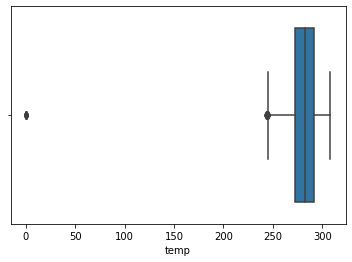

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(df['temp'])

In [ ]:
df=df[df['temp']>=200]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


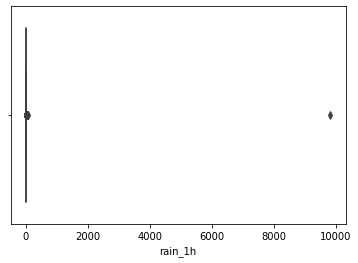

In [ ]:
sns.boxplot(df['rain_1h'])

In [ ]:
df['rain_1h'].sort_values()

0           0.00
25716       0.00
25717       0.00
25718       0.00
25719       0.00
          ...   
10807      28.70
25779      31.75
7179       44.45
8247       55.63
24872    9831.30
Name: rain_1h, Length: 38553, dtype: float64

In [ ]:
df=df[df['rain_1h']<60]

In [ ]:
df.head()

,date_time,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,year,month,week,day,hour,week_day
0,2012-10-02 09:00:00,None,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,2012,10,40,2,9,1
1,2012-10-02 10:00:00,None,289.36,0.0,0.0,75,Clouds,broken clouds,4516,2012,10,40,2,10,1
2,2012-10-02 11:00:00,None,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,2012,10,40,2,11,1
3,2012-10-02 12:00:00,None,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,2012,10,40,2,12,1
4,2012-10-02 13:00:00,None,291.14,0.0,0.0,75,Clouds,broken clouds,4918,2012,10,40,2,13,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
categ = ['weather_main','weather_description','holiday']
le = LabelEncoder()
df[categ] = df[categ].apply(le.fit_transform)

In [ ]:
df.head()

,date_time,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,year,month,week,day,hour,week_day
0,2012-10-02 09:00:00,7,288.28,0.0,0.0,40,1,24,5545,2012,10,40,2,9,1
1,2012-10-02 10:00:00,7,289.36,0.0,0.0,75,1,2,4516,2012,10,40,2,10,1
2,2012-10-02 11:00:00,7,289.58,0.0,0.0,90,1,19,4767,2012,10,40,2,11,1
3,2012-10-02 12:00:00,7,290.13,0.0,0.0,90,1,19,5026,2012,10,40,2,12,1
4,2012-10-02 13:00:00,7,291.14,0.0,0.0,75,1,2,4918,2012,10,40,2,13,1


In [ ]:
df.drop(['date_time'],axis=1,inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor 

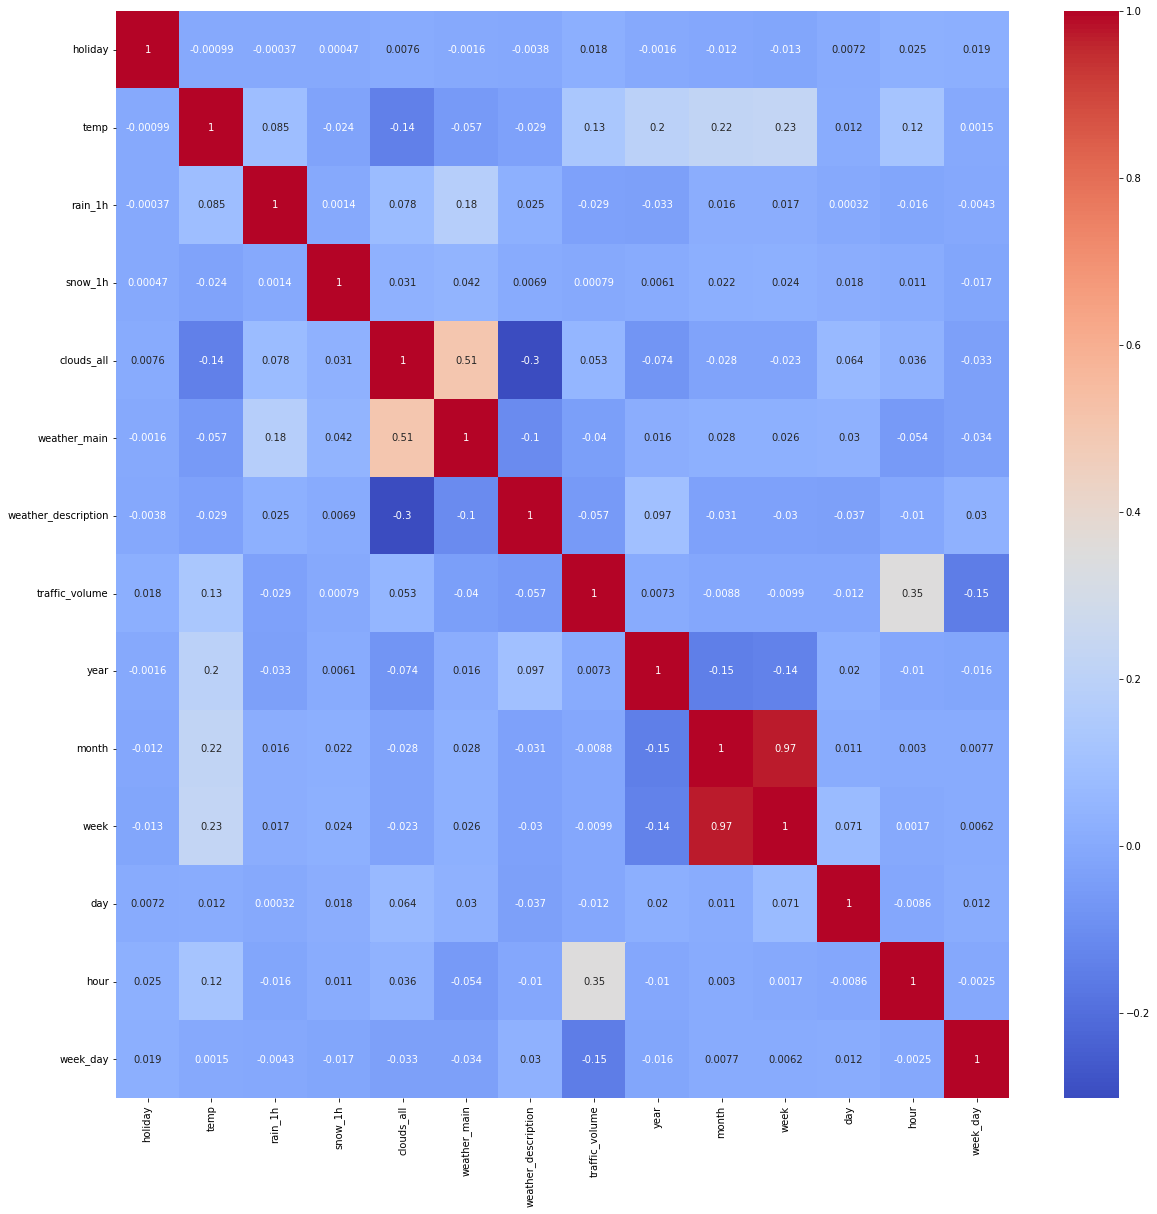

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

In [ ]:
y=df['traffic_volume']
X=df.drop(columns=['traffic_volume'])
X

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,year,month,week,day,hour,week_day
0,7,288.28,0.0,0.0,40,1,24,2012,10,40,2,9,1
1,7,289.36,0.0,0.0,75,1,2,2012,10,40,2,10,1
2,7,289.58,0.0,0.0,90,1,19,2012,10,40,2,11,1
3,7,290.13,0.0,0.0,90,1,19,2012,10,40,2,12,1
4,7,291.14,0.0,0.0,75,1,2,2012,10,40,2,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38558,7,274.35,0.0,0.0,90,8,16,2017,11,44,1,18,2
38559,7,274.62,0.0,0.0,90,2,11,2017,11,44,1,19,2
38560,7,274.62,0.0,0.0,90,5,17,2017,11,44,1,19,2
38561,7,274.62,0.0,0.0,90,6,13,2017,11,44,1,19,2


In [ ]:
y

0        5545
1        4516
2        4767
3        5026
4        4918
         ... 
38558    4297
38559    3045
38560    3045
38561    3045
38562    2704
Name: traffic_volume, Length: 38552, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

In [ ]:
x_train.shape

(30841, 13)

In [ ]:
x_test.shape

(7711, 13)

In [ ]:
y_train.shape

(30841,)

In [ ]:
y_test.shape

(7711,)

In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [ ]:
acc=mean_squared_error(y_test,y_pred,squared=False)
acc 

1823.477972238881

In [ ]:
 knn=KNeighborsRegressor()
 knn.fit(x_train,y_train)
 y_pred1 = knn.predict(x_test)

In [ ]:
acc1=mean_squared_error(y_test,y_pred1,squared=False)
acc1 

1072.2990159794983

In [ ]:
 rfr=RandomForestRegressor()
 rfr.fit(x_train,y_train)
 y_pred2 = rfr.predict(x_test)

In [ ]:
acc2=mean_squared_error(y_test,y_pred2,squared=False)
acc2 

371.9483156827085

In [ ]:
 gbr=GradientBoostingRegressor()
 gbr.fit(x_train,y_train)
 y_pred3 = gbr.predict(x_test)

In [ ]:
acc3=mean_squared_error(y_test,y_pred3,squared=False)
acc3 

507.1273595261407

In [ ]:
from sklearn.metrics import r2_score
r = r2_score(y_test, y_pred)
r1 = r2_score(y_test, y_pred1)
r2 = r2_score(y_test, y_pred2)
r3 = r2_score(y_test, y_pred3)
print("lr score: ",r)
print("knn score: ",r1)
print("rf score: ",r2)
print("gbr score: ",r3)

lr score:  0.16587839012829486
knn score:  0.7115569063207716
rf score:  0.9652948822035079
gbr score:  0.9354847458059063
